In [2]:
!unrar x "/content/drive/My Drive/COVID Splitaug2.rar" -d "/content/"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/My Drive/COVID Splitaug2.rar

Creating    /content/COVID Splitaug2                                  OK
Creating    /content/COVID Splitaug2/Test                             OK
Creating    /content/COVID Splitaug2/Test/COVID                       OK
Extracting  /content/COVID Splitaug2/Test/COVID/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89%0.png       0%  OK 
Extracting  /content/COVID Splitaug2/Test/COVID/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89%1.png       0%  OK 
Extracting  /content/COVID Splitaug2/Test/COVID/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-91.png       0%  OK 
Extracting  /content/COVID Splitaug2/Test/COVID/2020.03.12.20034686-p17-91-1.png       0%  OK 
Extracting  /content/COVID Splitaug2/Test/COVID/2020.03.12.20034686-p

In [4]:
import os
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import keras

import numpy as np 
import pandas as pd
import glob
import cv2
import os
from pathlib import Path
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

import os
import tensorflow as tf
from keras import layers
from keras import Model
from os import getcwd
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout,GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D
from keras.layers import MaxPooling2D, Dropout,Flatten
from keras import backend as K
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.xception import preprocess_input


In [5]:
data_dir = Path('/content/COVID Splitaug2') # Your Dataset Location Path
train_dir = os.path.join(data_dir, 'Train')
test_dir = os.path.join(data_dir, 'Test')
#test_dir2 = os.path.join(data_dir, 'Test2')
val_dir = os.path.join(data_dir, 'Val')
train_malaria_dir = os.path.join(train_dir, 'COVID') #Replace the folder names
train_uninfected_dir = os.path.join(train_dir, 'NON-COVID')
validation_malaria_dir = os.path.join(val_dir, 'COVID')
validation_uninfected_dir = os.path.join(val_dir, 'NON-COVID')
test_malaria_dir = os.path.join(test_dir, 'COVID') #Replace the folder names
test_uninfected_dir = os.path.join(test_dir, 'NON-COVID')
#test_malaria_dir2 = os.path.join(test_dir2, 'COVID') #Replace the folder names
#test_uninfected_dir2 = os.path.join(test_dir2, 'NON-COVID')

train_malaria_fnames = os.listdir(train_malaria_dir)
train_uninfected_fnames = os.listdir(train_uninfected_dir)
validation_malaria_fnames = os.listdir(validation_malaria_dir)
validation_uninfected_fnames = os.listdir(validation_uninfected_dir)
test_malaria_fnames = os.listdir(test_malaria_dir)
test_uninfected_fnames = os.listdir(test_uninfected_dir)
##test_malaria_fnames2 = os.listdir(test_malaria_dir2)
#test_uninfected_fnames2 = os.listdir(test_uninfected_dir2)


print(len(train_malaria_fnames))
print(len(validation_malaria_fnames))
print(len(train_uninfected_fnames))
print(len(validation_uninfected_fnames))
print("Test Covid", len(test_malaria_fnames))
print("Test Noncovid", len(test_uninfected_fnames))



955
60
1170
58
Test Covid 98
Test Noncovid 105


In [6]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    target_size=(224, 224)
                                                    )
validation_datagen = ImageDataGenerator(#rescale=1./255
                                        preprocessing_function=tf.keras.applications.densenet.preprocess_input
                                        )
 

validation_generator = validation_datagen.flow_from_directory(val_dir,
                                                              batch_size=8,
                                                              class_mode='categorical',
                                                              target_size=(224, 224))

Found 2125 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


In [7]:
model = keras.applications.DenseNet169(input_shape = (224, 224, 3), 
                                include_top = True, 
                                weights = 'imagenet')


for layer in model.layers:
    layer.trainable = True
  
    
model.summary()

58548224/58541896 [==============================] - 1s 0us/step
Model: "densenet169"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________

In [8]:
last_layer = model.get_layer('avg_pool')
last_output = last_layer.output

x = keras.layers.Dense(2,activation='softmax')(last_output)           

model = Model( model.input, x) 

model.compile(optimizer = Adam(lr=0.00001), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [9]:
early = keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=4, verbose=1
)
#history = model.fit(
            #x=X_train, y=y_train, 
             #       batch_size=16,
              #      epochs=50, 
               #     validation_data=(X_val , y_val),callbacks = [early],
            #
            #verbose=1
        #)
history = model.fit_generator(train_generator,
            validation_data = validation_generator,
            epochs = 30, callbacks = [early]
            )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
133/133 [==============================] - 1879s 14s/step - loss: 0.4224 - acc: 0.7995 - val_loss: 0.4801 - val_acc: 0.7458
Epoch 2/30
133/133 [==============================] - 1868s 14s/step - loss: 0.1592 - acc: 0.9652 - val_loss: 0.2860 - val_acc: 0.8814
Epoch 3/30
133/133 [==============================] - 1875s 14s/step - loss: 0.0841 - acc: 0.9878 - val_loss: 0.1861 - val_acc: 0.9322
Epoch 4/30
133/133 [==============================] - 1856s 14s/step - loss: 0.0535 - acc: 0.9925 - val_loss: 0.1539 - val_acc: 0.9322
Epoch 5/30
133/133 [==============================] - 1837s 14s/step - loss: 0.0336 - acc: 0.9986 - val_loss: 0.1375 - val_acc: 0.9407
Epoch 6/30
133/133 [==============================] - 1862s 14s/step - loss: 0.0218 - acc: 1.0000 - val_loss: 0.1383 - val_acc: 0.9576
Epoch 7/30
133/133 [==============================] - 1839s 14s/step - loss: 0.0203 - acc: 0.9981 - val_loss: 0.14

In [10]:

data_dir = Path('/content/COVID Splitaug2')
test_dir = os.path.join(data_dir, 'Test')
test_malaria_dir = os.path.join(test_dir, 'COVID') #Replace the folder names
test_uninfected_dir = os.path.join(test_dir, 'NON-COVID')
test_malaria_fnames = os.listdir(test_malaria_dir)
test_uninfected_fnames = os.listdir(test_uninfected_dir)
print(len(test_malaria_fnames))
print(len(test_uninfected_fnames))

98
105


In [18]:
testGenerator = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(test_dir, 
                                                      batch_size=16,
                                                    class_mode='categorical',shuffle=False,target_size=(224,224)
                                                      )

Found 203 images belonging to 2 classes.


In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
batch_size = 16
num_of_test_samples = 203
predictions = model.predict_generator(testGenerator)

y_pred = np.argmax(predictions, axis=1)

true_classes = testGenerator.classes

class_labels = list(testGenerator.class_indices.keys())   

print(class_labels)

print(confusion_matrix(testGenerator.classes, y_pred))

report = classification_report(true_classes, y_pred, target_names=class_labels)
print(report)

['COVID', 'NON-COVID']
[[ 88  10]
 [  3 102]]
              precision    recall  f1-score   support

       COVID       0.97      0.90      0.93        98
   NON-COVID       0.91      0.97      0.94       105

    accuracy                           0.94       203
   macro avg       0.94      0.93      0.94       203
weighted avg       0.94      0.94      0.94       203



In [13]:
model.evaluate(testGenerator)

13/13 [==============================] - 31s 2s/step - loss: 0.3178 - acc: 0.9360


[0.31780579686164856, 0.935960590839386]

In [14]:
from sklearn.metrics import  f1_score,roc_auc_score
f1_score(testGenerator.classes, y_pred)


0.9400921658986174

In [15]:
roc_auc_score(testGenerator.classes, y_pred)

0.9346938775510205

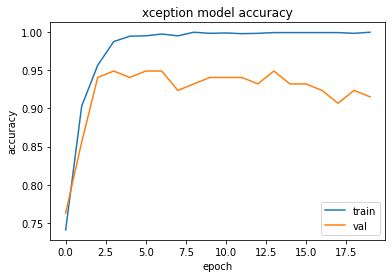

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('xception model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')

#plt.savefig('cnnaccpneu1.png')
plt.show()
#PLEASE IGNORE THE 'Xception Model accuracy' TITLE, THIS IS THE ACCURACY GRAPH OF DENSENET169

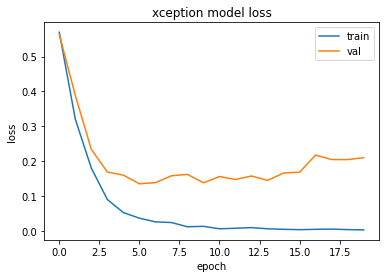

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('xception model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')

#plt.savefig('cnnaccpneu1.png')
plt.show()
#PLEASE IGNORE THE 'Xception Model loss' TITLE, THIS IS THE LOSS GRAPH OF DENSENET169